>### Mini-Batch
 - 均衡于算法的时间复杂度（加载全部数据训练更快）以及算法的准确度（加载单个数据训练更准）

    在外层循环中，每一层是一个epoch（训练周期），在内层循环中，每一次是一个Mini-Batch（Batch的迭代）
    ``` 
    for epoch in range(training_epochs):
         for i in range(total_batch):
   ```

>### DataLoader
- 参数\
    batch_size,shuffle(洗牌，用于打乱顺序)
- 功能\
  通过获得DataSet的索引以及数据集大小，来自动得生成小批量训练集

    DataLoader先对数据集进行洗牌，再将数据集按照Batch_Size的长度划分为小的Batch，并按照Iterations进行加载，以方便通过循环对每个Batch进行操作
    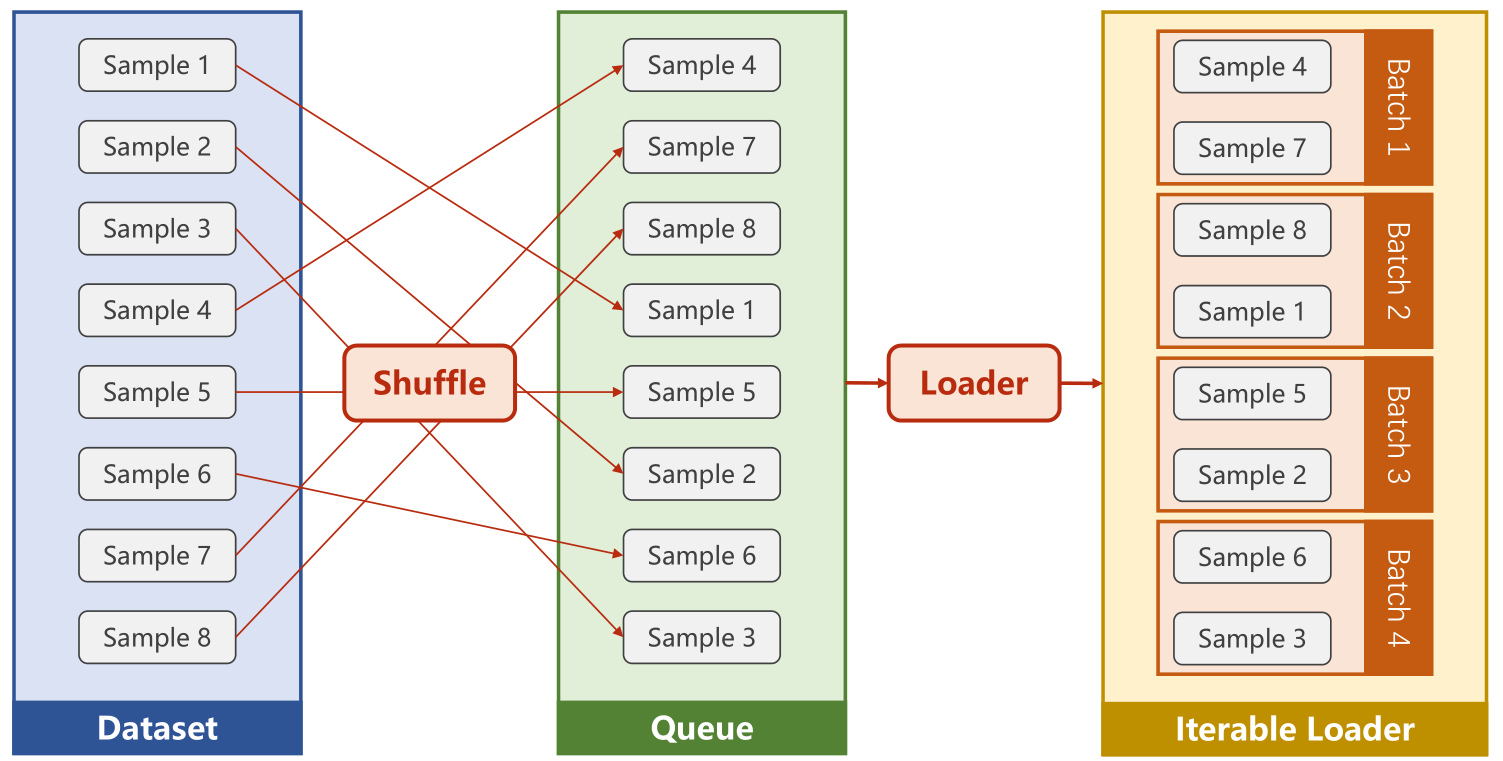

In [2]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class DiabetesDataset(Dataset):
    def __init__(self, filepath) -> None:
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        #获得数据集长度
        self.len=xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

dataset = DiabetesDataset("diabetes.csv")
train_loader = DataLoader(dataset=dataset, batch_size=32,
         shuffle=True, num_workers=0)


class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

model = Model()

criterion = torch.nn.BCELoss(size_average=True)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

if __name__ == "__main__":
    for epoch in range(100):
        for i, data in enumerate(train_loader, 0):
            # 将loader中的数据改写成x,y
            inputs, labels = data
            y_pred = model(inputs)
            loss = criterion(y_pred, labels)
            print(epoch, i, loss.item())

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

d:\anaconda\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


0 0 0.66230708360672
0 1 0.642998218536377
0 2 0.6235267519950867
0 3 0.6228886246681213
0 4 0.622759222984314
0 5 0.6019943356513977
0 6 0.6420154571533203
0 7 0.6649735569953918
0 8 0.6017891764640808
0 9 0.6635593175888062
0 10 0.7039589881896973
0 11 0.5829301476478577
0 12 0.7051016688346863
0 13 0.6013761162757874
0 14 0.6221039891242981
0 15 0.6832667589187622
0 16 0.5821902751922607
0 17 0.622654914855957
0 18 0.6226121187210083
0 19 0.7057185769081116
0 20 0.663196325302124
0 21 0.6632803082466125
0 22 0.6631464958190918
0 23 0.729971170425415
1 0 0.5855417251586914
1 1 0.721856951713562
1 2 0.6424908638000488
1 3 0.6431365609169006
1 4 0.5854506492614746
1 5 0.5638682246208191
1 6 0.6425354480743408
1 7 0.56104576587677
1 8 0.6843464374542236
1 9 0.7063698172569275
1 10 0.7033014297485352
1 11 0.6617982387542725
1 12 0.6631442904472351
1 13 0.7390986084938049
1 14 0.6255627870559692
1 15 0.5490671396255493
1 16 0.6031545400619507
1 17 0.6638224720954895
1 18 0.643197238445282